#**Importing the Google Drive module to access files stored in Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Understanding: Exploring the Structure of HDF5 Data Files**


*   This code snippet loads an HDF5 file from Google Drive and iterates through its hierarchical structure.
*   The purpose is to understand the organization of data within the file, including days, metadata, and trials.




In [ ]:
import os
import h5py

# Path to data files
path = '/content/drive/MyDrive/MyPredict 3'
subj = 'MP304.hdf5'

# Load first file
hf = h5py.File(os.path.join(path, subj))

# Iterate over file structure
for day in hf:
    # Print the current day
    print(f'Day: {day}')

    # Print metadata if the day is 'Meta'
    if 'Meta' in day:
        print('Meta data: {}'.format({k: v[()] for k, v in hf[day].items()}))
    else:
        print(f'Trials: {list(hf[day].keys())}')

        for trial_name in hf[day]:
            trial = hf[day][trial_name]
            print(f"Content in {trial_name}: {list(trial.keys())}")

Day: Day_1
Trials: ['MVC', 'MVCf', 'MVCz', 'Trial_01', 'Trial_02', 'Trial_03', 'Trial_04', 'Trial_05', 'Trial_06', 'Trial_07', 'Trial_08', 'Trial_09', 'Trial_10', 'Trial_11', 'Trial_12', 'Trial_13', 'Trial_14', 'Trial_15', 'Trial_16', 'Trial_17', 'Trial_18', 'Trial_19', 'Trial_20', 'Trial_21', 'Trial_22', 'Trial_23', 'Trial_24', 'Trial_25', 'Trial_26', 'Trial_27', 'Trial_28', 'Trial_29', 'Trial_30', 'Trial_31', 'Trial_32', 'Trial_33', 'Trial_34', 'Trial_35', 'Trial_36', 'Trial_37', 'Trial_38', 'Trial_39', 'Trial_40', 'Trial_41', 'Trial_42', 'Trial_43', 'Trial_44', 'Trial_45', 'Trial_46', 'Trial_47', 'Trial_48', 'Trial_49']
Content in MVC: ['EMG_Left_AM', 'EMG_Left_BF', 'EMG_Left_GM', 'EMG_Left_Gmax', 'EMG_Left_RF', 'EMG_Left_ST', 'EMG_Left_TA', 'EMG_Left_VL', 'EMG_Right_AM', 'EMG_Right_BF', 'EMG_Right_GM', 'EMG_Right_Gmax', 'EMG_Right_MA', 'EMG_Right_RF', 'EMG_Right_ST', 'EMG_Right_TA', 'EMG_Right_VL']
Content in MVCf: ['EMG_Left_AM', 'EMG_Left_BF', 'EMG_Left_GM', 'EMG_Left_Gmax', 'EMG

In [ ]:
print(hf['Day_7']["Trial_01"]['Acc_Right_Thigh'][()])
print(hf['Day_7']["Trial_01"]['EMG_Right_AM'][()])

[[-0.03662446 -0.00133318 -0.01295463]
 [-0.01878183 -0.01796226  0.00133131]
 [-0.00326252 -0.03523667  0.01570302]
 ...
 [ 0.01634418 -0.08059409  0.0370992 ]
 [ 0.02675685 -0.0824005   0.0211411 ]
 [ 0.04344049 -0.08126436 -0.00656729]]
[[ 2.2906056 ]
 [-1.89060196]
 [-0.26091326]
 ...
 [-6.17997434]
 [-5.04447623]
 [-6.87550467]]


# **Data Understanding: Extracting Data Component from HDF5 Files for Further Analysis**



*   This code loads an HDF5 file, extracts relevant information for the right leg including: acceleration (Acc) and angular velocity (Gyr) of the thigh, shank and foot, knee angle, ankle angle and EMG from eight muscles and stores it in a Pandas DataFrame for further analysis.


In [ ]:
import os
import h5py
import numpy as np
import pandas as pd

# Path to data files
path = '/content/drive/MyDrive/MyPredict 3'
subj = 'MP304.hdf5'

# Load the HDF5 file
hf = h5py.File(os.path.join(path, subj), 'r')

# Create a list to store DataFrames for the right leg data from each trial
all_data = []

# Specify day and trials to ignore
day_to_ignore = ['Meta']
trials_to_ignore = ['MVC', 'MVCf', 'MVCz']

# Iterate over all days in the HDF5 file
for day in hf:
    # Check if the day should be ignored
    if day in day_to_ignore:
        continue
    # Iterate over all trials for the specified day
    for trial_name in hf[day]:
        # Check if the trial should be ignored
        if trial_name in trials_to_ignore:
            continue

        trial = hf[day][trial_name]
        print(f"Content in {trial_name}: {list(trial.keys())}")

        # Extract time and label
        time = trial['Time'][()]
        label = trial['Label'][()]

        # Extract right leg joint angles (3 components each)
        knee_r = trial['Ang_Right_Knee'][()]
        ankle_r = trial['Ang_Right_Ankle'][()]

        # Extract accelerations for right thigh, shank, and foot (3 components each)
        Acc_Right_Thigh = trial['Acc_Right_Thigh'][()]
        Acc_Right_Shank = trial['Acc_Right_Shank'][()]
        acc_right_foot = trial['Acc_Right_Foot'][()]

        # Extract angular velocity for right thigh, shank, and foot (3 components each)
        Gyr_Right_Thigh = trial['Gyr_Right_Thigh'][()]
        Gyr_Right_Shank = trial['Gyr_Right_Shank'][()]
        gyr_right_foot = trial['Gyr_Right_Foot'][()]

        # Extract EMG signals from right leg muscles (1 component each)
        emg_right_AM = trial['EMG_Right_AM'][()].flatten()
        emg_right_bf = trial['EMG_Right_BF'][()].flatten()
        emg_right_gm = trial['EMG_Right_GM'][()].flatten()
        emg_right_gmax = trial['EMG_Right_Gmax'][()].flatten()
        emg_right_rf = trial['EMG_Right_RF'][()].flatten()
        emg_right_st = trial['EMG_Right_ST'][()].flatten()
        emg_right_ta = trial['EMG_Right_TA'][()].flatten()
        emg_right_vl = trial['EMG_Right_VL'][()].flatten()

        # Create a DataFrame for the right leg data of the trial
        data_trial = {
            'Day': day,
            'Trial': trial_name,
            'Time (s)': time.flatten(),
            'Right Knee Angle X': knee_r[:, 0],
            'Right Knee Angle Y': knee_r[:, 1],
            'Right Knee Angle Z': knee_r[:, 2],
            'Right Ankle Angle X': ankle_r[:, 0],
            'Right Ankle Angle Y': ankle_r[:, 1],
            'Right Ankle Angle Z': ankle_r[:, 2],
            'Right Thigh Acc X': Acc_Right_Thigh[:, 0],
            'Right Thigh Acc Y': Acc_Right_Thigh[:, 1],
            'Right Thigh Acc Z': Acc_Right_Thigh[:, 2],
            'Right Shank Acc X': Acc_Right_Shank[:, 0],
            'Right Shank Acc Y': Acc_Right_Shank[:, 1],
            'Right Shank Acc Z': Acc_Right_Shank[:, 2],
            'Right Foot Acc X': acc_right_foot[:, 0],
            'Right Foot Acc Y': acc_right_foot[:, 1],
            'Right Foot Acc Z': acc_right_foot[:, 2],
            'Right Thigh Gyr X': Gyr_Right_Thigh[:, 0],
            'Right Thigh Gyr Y': Gyr_Right_Thigh[:, 1],
            'Right Thigh Gyr Z': Gyr_Right_Thigh[:, 2],
            'Right Shank Gyr X': Gyr_Right_Shank[:, 0],
            'Right Shank Gyr Y': Gyr_Right_Shank[:, 1],
            'Right Shank Gyr Z': Gyr_Right_Shank[:, 2],
            'Right Foot Gyr X': gyr_right_foot[:, 0],
            'Right Foot Gyr Y': gyr_right_foot[:, 1],
            'Right Foot Gyr Z': gyr_right_foot[:, 2],
            'EMG Right AM': emg_right_AM,
            'EMG Right BF': emg_right_bf,
            'EMG Right GM': emg_right_gm,
            'EMG Right Gmax': emg_right_gmax,
            'EMG Right RF': emg_right_rf,
            'EMG Right ST': emg_right_st,
            'EMG Right TA': emg_right_ta,
            'EMG Right VL': emg_right_vl,
            'Label': label.flatten()
        }

        # Convert to DataFrame
        df_trial = pd.DataFrame(data_trial)

        # Append to the all_data list
        all_data.append(df_trial)

# Check if there are any data frames to concatenate
if all_data:
    # Concatenate all DataFrames into a single DataFrame for all trials
    final_data = pd.concat(all_data, ignore_index=True)

    # Display the final DataFrame
    print(final_data.head())


Content in Trial_01: ['Acc_Left_Foot', 'Acc_Left_Shank', 'Acc_Left_Thigh', 'Acc_Pelvis', 'Acc_Right_Foot', 'Acc_Right_Shank', 'Acc_Right_Thigh', 'Acc_T8', 'Ang_L5S1', 'Ang_Left_Ankle', 'Ang_Left_Hip', 'Ang_Left_Knee', 'Ang_Right_Ankle', 'Ang_Right_Hip', 'Ang_Right_Knee', 'EMG_Left_AM', 'EMG_Left_BF', 'EMG_Left_GM', 'EMG_Left_Gmax', 'EMG_Left_RF', 'EMG_Left_ST', 'EMG_Left_TA', 'EMG_Left_VL', 'EMG_Right_AM', 'EMG_Right_BF', 'EMG_Right_GM', 'EMG_Right_Gmax', 'EMG_Right_MA', 'EMG_Right_RF', 'EMG_Right_ST', 'EMG_Right_TA', 'EMG_Right_VL', 'Gyr_Left_Foot', 'Gyr_Left_Shank', 'Gyr_Left_Thigh', 'Gyr_Pelvis', 'Gyr_Right_Foot', 'Gyr_Right_Shank', 'Gyr_Right_Thigh', 'Gyr_T8', 'Label', 'Markers', 'Time']
Content in Trial_02: ['Acc_Left_Foot', 'Acc_Left_Shank', 'Acc_Left_Thigh', 'Acc_Pelvis', 'Acc_Right_Foot', 'Acc_Right_Shank', 'Acc_Right_Thigh', 'Acc_T8', 'Ang_L5S1', 'Ang_Left_Ankle', 'Ang_Left_Hip', 'Ang_Left_Knee', 'Ang_Right_Ankle', 'Ang_Right_Hip', 'Ang_Right_Knee', 'EMG_Left_AM', 'EMG_Left_BF

#**Data Understanding: Label Mapping**

*   Add Label Description
*   Label Analysis



In [ ]:
import pandas as pd

# Step 1: Check Unique Labels
unique_labels = final_data['Label'].unique()
print("Unique Labels:", unique_labels)

# Step 2: Count occurrences of each label
label_counts = final_data['Label'].value_counts().sort_index()

# Step 3: Create a DataFrame for better display
label_summary = label_counts.reset_index()
label_summary.columns = ['Label', 'Count']

# Step 4: Add Label Description
label_mapping = {
    -2: "Between tracks",
    -1: "Error in data",
    0: "Sitting",
    1: "Standing",
    2: "Walking",
    2.1: "Turn (around axes)",
    3: "Ascending stairs",
    4: "Descending stairs",
    5: "Ascending a ramp",
    6: "Descending a ramp",
    7: "Walking on uneven terrain",
    7.1: "Walking on uneven terrain (grass)",
    7.2: "Walking on uneven terrain (for track 3, middle part)",
    7.3: "Walking on uneven terrain (for track 3, last part)",
    8.1: "Diagonal step in front left",
    8.2: "Diagonal step in front right",
    8.3: "Diagonal step backwards right",
    8.4: "Diagonal step backwards left",
    8.5: "Small steps in front",
    8.6: "Small steps to the right",
    8.7: "Small steps backwards",
    8.8: "Small steps to the left",
    9: "Laying down"
}

# Step 5: Add descriptions to the summary DataFrame
label_summary['Label Description'] = label_summary['Label'].map(label_mapping)

# Display the final summary
print(label_summary)

# Add New Column for Label Description
final_data['Label Description'] = final_data['Label'].map(label_mapping)

# Display the updated DataFrame
print(final_data)

Unique Labels: [ 0.   1.   2.   3.   6.   2.1  5.   4.   8.6  8.1  8.2  8.3  8.4  8.5
  8.7  8.8 -1. ]
    Label    Count              Label Description
0    -1.0     1800                  Error in data
1     0.0  3623165                        Sitting
2     1.0   800708                       Standing
3     2.0  2297012                        Walking
4     2.1   781092             Turn (around axes)
5     3.0   550643               Ascending stairs
6     4.0   506627              Descending stairs
7     5.0   781696               Ascending a ramp
8     6.0   621596              Descending a ramp
9     8.1   245099    Diagonal step in front left
10    8.2   153399   Diagonal step in front right
11    8.3   192699  Diagonal step backwards right
12    8.4   285600   Diagonal step backwards left
13    8.5   132600           Small steps in front
14    8.6   386597       Small steps to the right
15    8.7   177000          Small steps backwards
16    8.8   208300        Small steps to the le

In [ ]:
import pandas as pd


# Step 1: Group the data by 'Day', 'Trial', and 'Label' and count occurrences
label_counts_by_trial_day = final_data.groupby(['Day', 'Trial', 'Label']).size().reset_index(name='Count')

# Step 2: Add Label Descriptions
label_mapping = {
    -2: "Between tracks",
    -1: "Error in data",
    0: "Sitting",
    1: "Standing",
    2: "Walking",
    2.1: "Turn (around axes)",
    3: "Ascending stairs",
    4: "Descending stairs",
    5: "Ascending a ramp",
    6: "Descending a ramp",
    7: "Walking on uneven terrain",
    7.1: "Walking on uneven terrain (grass)",
    7.2: "Walking on uneven terrain (for track 3, middle part)",
    7.3: "Walking on uneven terrain (for track 3, last part)",
    8.1: "Diagonal step in front left",
    8.2: "Diagonal step in front right",
    8.3: "Diagonal step backwards right",
    8.4: "Diagonal step backwards left",
    8.5: "Small steps in front",
    8.6: "Small steps to the right",
    8.7: "Small steps backwards",
    8.8: "Small steps to the left",
    9: "Laying down"
}

# Step 3: Map label descriptions to the 'Label' column in the grouped data
label_counts_by_trial_day['Label Description'] = label_counts_by_trial_day['Label'].map(label_mapping)

# Step 4: Display the results
print(label_counts_by_trial_day)


        Day     Trial  Label  Count             Label Description
0     Day_1  Trial_01    0.0  20801                       Sitting
1     Day_1  Trial_01    1.0   6500                      Standing
2     Day_1  Trial_01    2.0  13891                       Walking
3     Day_1  Trial_01    2.1   5000            Turn (around axes)
4     Day_1  Trial_01    3.0   3385              Ascending stairs
...     ...       ...    ...    ...                           ...
1594  Day_7  Trial_45    8.4   8400  Diagonal step backwards left
1595  Day_7  Trial_45    8.5   4500          Small steps in front
1596  Day_7  Trial_45    8.6  12400      Small steps to the right
1597  Day_7  Trial_45    8.7   6300         Small steps backwards
1598  Day_7  Trial_45    8.8   7100       Small steps to the left

[1599 rows x 5 columns]


# **Data Preparation: Filtering and Sampling Data by Labels from a DataFrame**

*   This code filters a DataFrame to extract specific trials and labels of interest (Ramp Ascending (5) and Descending (6) activities)

*   Filter for Trials from Trial_01 to Trial_40 within the specified days and stores the results in separate DataFrames for each label

*    It samples the last 300 data points from each trial, processing in reverse until there are no full chunks of 300 left.
If there are not enough data points (fewer than 300) left in a trial, it skips sampling for that trial and moves on to the next one



In [ ]:
import pandas as pd

# Step 1: Define the labels of interest
labels_of_interest = [5, 6]  # We can modify this list to include more labels if needed

# Step 2: Create an empty DataFrame for each label
Lsampled_datasets5 = pd.DataFrame()
Lsampled_datasets6 = pd.DataFrame()

# Step 3: Loop through each label and filter data
for label in labels_of_interest:
    # Filter the DataFrame for the current label and specified days
    filtered_data = final_data.query('Label == @label and Day in ["Day_1", "Day_2", "Day_3", "Day_7"]')

    # Filter for Trials from Trial_01 to Trial_40
    filtered_data = filtered_data[filtered_data['Trial'].str.match(r'Trial_([0-3][0-9]|40)')]

    # Function to get the last 300 data points for each Trial within a Day
    def sample_last_300_multiple(group):
        all_samples = []
        total_samples = len(group)

        # Extract samples in chunks of 300 until fewer than 300 samples are left
        for start in range(total_samples, 0, -300):
            if start - 300 >= 0:  # Check if there's enough data to sample
                chunk = group.iloc[start - 300:start]
                all_samples.append(chunk)

        # Concatenate all sampled chunks if not empty
        if all_samples:
            return pd.concat(all_samples)

        return pd.DataFrame()  # Return empty DataFrame if no samples

    # Group by Day and Trial, and apply the sampling function
    sampled_data = (filtered_data
                    .groupby(['Day', 'Trial'])
                    .apply(sample_last_300_multiple)
                    .reset_index(drop=True))

    # Save the sampled data into the corresponding dataset based on the label
    if label == 5:
        Lsampled_datasets5 = sampled_data
    elif label == 6:
        Lsampled_datasets6 = sampled_data

# Print the sampled datasets for each label
print("Sampled Data for Label 5:")
print(Lsampled_datasets5.head())

print("\nSampled Data for Label 6:")
print(Lsampled_datasets6.head())


<ipython-input-8-1a6be8d6cad9>:38: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(sample_last_300_multiple)


Sampled Data for Label 5:
     Day     Trial  Time (s)  Right Knee Angle X  Right Knee Angle Y  \
0  Day_1  Trial_01    48.701            3.145571            3.960211   
1  Day_1  Trial_01    48.702            3.179730            4.049220   
2  Day_1  Trial_01    48.703            3.211908            4.139218   
3  Day_1  Trial_01    48.704            3.242242            4.230241   
4  Day_1  Trial_01    48.705            3.270803            4.322245   

   Right Knee Angle Z  Right Ankle Angle X  Right Ankle Angle Y  \
0           46.051951            -3.893490             5.509706   
1           45.795063            -3.904850             5.522865   
2           45.536610            -3.915518             5.535601   
3           45.276418            -3.925515             5.547916   
4           45.014509            -3.934869             5.559827   

   Right Ankle Angle Z  Right Thigh Acc X  ...  EMG Right AM  EMG Right BF  \
0             5.646203           2.107529  ...     -0.516761

<ipython-input-8-1a6be8d6cad9>:38: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(sample_last_300_multiple)


In [ ]:
print(Lsampled_datasets5)
print(Lsampled_datasets6)

          Day     Trial  Time (s)  Right Knee Angle X  Right Knee Angle Y  \
0       Day_1  Trial_01    48.701            3.145571            3.960211   
1       Day_1  Trial_01    48.702            3.179730            4.049220   
2       Day_1  Trial_01    48.703            3.211908            4.139218   
3       Day_1  Trial_01    48.704            3.242242            4.230241   
4       Day_1  Trial_01    48.705            3.270803            4.322245   
...       ...       ...       ...                 ...                 ...   
749395  Day_7  Trial_40   497.396            0.350268           -4.762701   
749396  Day_7  Trial_40   497.397            0.349334           -4.821772   
749397  Day_7  Trial_40   497.398            0.348481           -4.881380   
749398  Day_7  Trial_40   497.399            0.347769           -4.941646   
749399  Day_7  Trial_40   497.400            0.347237           -5.002637   

        Right Knee Angle Z  Right Ankle Angle X  Right Ankle Angle Y  \
0  

# **Data Preparation: Feature Extraction**

For each sensor channel, a 300 ms window was extracted:
*   The extracted features for mechanical sensor data included the mean, standard deviation, maximum value, minimum value, start value, and end value.
*   For EMG signals, The eight TD features include: mean absolute value (MAV), variance (VAR), root mean square (RMS), slope sign change (SSC), zero crossing (ZC), waveform length (WL), fourth-order of autoregressive model (ARi), and fourth cepstral coefficient (CC). The two FD features are mean frequency (MNF) and median frequency (MDF). The three TF features include wavelet transform waveform length (WTWL), wavelet transform variance (WTVAR), and wavelet transform mean absolute value (WTMAV).

In [ ]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 32.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from scipy.fftpack import fft
import pywt

# Define window size in terms of seconds and sample rate
window_size = 0.300  # 300 ms
sample_rate = 1000  # 1000 Hz
n_samples = int(window_size * sample_rate)  # Number of samples in the window

# Define feature calculation functions
def mean_absolute_value(signal):
    """Calculate Mean Absolute Value (MAV)"""
    return np.mean(np.abs(signal))

def variance(signal):
    """Calculate Variance (VAR)"""
    return np.var(signal)

def root_mean_square(signal):
    """Calculate Root Mean Square (RMS)"""
    return np.sqrt(np.mean(signal**2))

def zero_crossings(signal, threshold=0.05):
    """Calculate Zero Crossings (ZC)"""
    return np.sum((np.sign(signal[:-1]) != np.sign(signal[1:])) &
                  (np.abs(signal[:-1] - signal[1:]) >= threshold))

def slope_sign_changes(signal, threshold=0.05):
    """Calculate Slope Sign Changes (SSC)"""
    changes = (signal[1:] - signal[:-1])
    sign_changes = (changes[:-1] * changes[1:] < 0)
    threshold_condition = (np.abs(changes[1:]) >= threshold)
    return np.sum(sign_changes & threshold_condition)

def waveform_length(signal):
    """Calculate Waveform Length (WL)"""
    return np.sum(np.abs(np.diff(signal)))

def auto_regression(signal, p=4):
    """Calculate Auto-Regression coefficients (AR), returning all coefficients."""
    model = AutoReg(signal, lags=p)
    model_fit = model.fit()
    return model_fit.params  # Return all AR coefficients

def cepstral_coefficients(ar_coeff):
    """Calculate Cepstral Coefficients (CC) from AR coefficients, returning only the 4th."""
    cc = np.zeros_like(ar_coeff)
    cc[0] = -ar_coeff[0]  # c1 = -a1
    for k in range(1, len(ar_coeff)):
        sum_term = np.sum([(i / (k + 1)) * ar_coeff[i] * cc[k - i - 1] for i in range(k)])
        cc[k] = -ar_coeff[k] - sum_term

    return cc[3]  # Return only the 4th CC coefficient (index 3)

def mean_frequency(signal):
    """Calculate Mean Frequency (MNF)"""
    spectrum = np.abs(fft(signal)) # The FFT of the signal is computed, returning complex numbers. The absolute value of these complex numbers gives the magnitude of the frequency components, which are stored in the spectrum.
    freq_bins = np.fft.fftfreq(len(signal), d=1/sample_rate) # The np.fft.fftfreq function generates the frequency bins corresponding to the FFT output. The d parameter is the sample spacing, calculated as the inverse of the sample rate. This gives you the frequency values associated with each FFT output.
    mnf = np.sum(freq_bins * spectrum) / np.sum(spectrum)
    return mnf

def median_frequency(signal):
    """Calculate Median Frequency (MDF)"""
    spectrum = np.abs(fft(signal))
    cumulative_power = np.cumsum(spectrum)
    total_power = cumulative_power[-1]
    mdf = np.where(cumulative_power >= total_power / 2)[0][0]
    return mdf

# To obtain the wavelet coefficients, we need to apply a wavelet transform to the signal. The wavelet transform decomposes a signal into components at different frequency scales (levels) using a specific wavelet function. The most common method for obtaining wavelet coefficients is the Continuous Wavelet Transform (CWT) that is used in this study.
def wavelet_transform_features(signal):
    """Calculate Wavelet Transform Features (WTWL, WTVAR, WTMAV)"""
    coeffs, _ = pywt.cwt(signal, scales=np.arange(1, len(signal)), wavelet='mexh')
    wtwl = np.sum(np.abs(np.diff(coeffs)))
    wtmav = np.mean(np.abs(coeffs))
    wtv_mean = np.mean(coeffs)
    wtv_var = np.var(coeffs - wtv_mean)
    return wtwl, wtv_var, wtmav

def extract_features_for_window(data):
    """Extract features for each sensor channel in fixed windows."""
    features = {}

    # Loop through the data in fixed windows
    for start_index in range(0, len(data) - n_samples + 1, n_samples):
        end_index = start_index + n_samples
        window = data.iloc[start_index:end_index]  # Extract the fixed window

        # Process each sensor channel in the window
        sensor_columns = [col for col in data.columns if 'Angle' in col or 'Acc' in col or 'Gyr' in col]
        for col in sensor_columns:
            signal = window[col].to_numpy()
            if len(signal) < 1:
                continue  # Skip if there's not enough data

            # Compute sensor features
            features.setdefault('Mean_' + col, []).append(np.mean(signal))
            features.setdefault('StdDev_' + col, []).append(np.std(signal))
            features.setdefault('Max_' + col, []).append(np.max(signal))
            features.setdefault('Min_' + col, []).append(np.min(signal))
            features.setdefault('Start_' + col, []).append(signal[0])  # First value of the window
            features.setdefault('End_' + col, []).append(signal[-1])    # Last value of the window

        # Process EMG channels similarly
        emg_columns = [col for col in data.columns if 'EMG' in col]
        for col in emg_columns:
            signal = window[col].to_numpy()
            if len(signal) < 1:
                continue  # Skip if there's not enough data

            # Compute EMG features
            try:
                features.setdefault('MAV_' + col, []).append(mean_absolute_value(signal))
                features.setdefault('VAR_' + col, []).append(variance(signal))
                features.setdefault('RMS_' + col, []).append(root_mean_square(signal))
                features.setdefault('ZC_' + col, []).append(zero_crossings(signal))
                features.setdefault('SSC_' + col, []).append(slope_sign_changes(signal))
                features.setdefault('WL_' + col, []).append(waveform_length(signal))

                # Auto-regression feature (AR coefficient)
                ar_coeffs = auto_regression(signal)  # Get all AR coefficients
                features.setdefault('AR4_' + col, []).append(ar_coeffs[4])  # Store only the 4th AR coefficient

                # Cepstral Coefficient (4th CC) calculation
                cc_coeff = cepstral_coefficients(ar_coeffs)
                features.setdefault('CC4_' + col, []).append(cc_coeff)

                # Frequency-domain features
                features.setdefault('MNF_' + col, []).append(mean_frequency(signal))
                features.setdefault('MDF_' + col, []).append(median_frequency(signal))

                # Time-frequency features
                wtwl, wtv_var, wtmav = wavelet_transform_features(signal)
                features.setdefault('WTWL_' + col, []).append(wtwl)
                features.setdefault('WTVAR_' + col, []).append(wtv_var)
                features.setdefault('WTMAV_' + col, []).append(wtmav)

            except Exception as e:
                print(f"Error processing {col} in window {start_index}-{end_index}: {e}")
                # Append NaN for this feature if an error occurs
                for key in features.keys():
                    if key.startswith(col):
                        features[key].append(np.nan)

        # Store start and end timestamps for the window
        features.setdefault('Start_Time', []).append(window['Time (s)'].iloc[0])
        features.setdefault('End_Time', []).append(window['Time (s)'].iloc[-1])

        # Assign the label to each extracted feature
        features.setdefault('Label', []).append(window['Label'].iloc[0])

        # Add Day and Trial information
        features.setdefault('Day', []).append(window['Day'].iloc[0])
        features.setdefault('Trial', []).append(window['Trial'].iloc[0])

    # Check if all feature lists are of the same length
    lengths = [len(v) for v in features.values()]
    if len(set(lengths)) > 1:
        print(f"Feature lengths are inconsistent: {lengths}")
        # Handle inconsistent lengths (e.g., raise an error or fill with NaN)
        max_length = max(lengths)
        for key in features.keys():
            while len(features[key]) < max_length:
                features[key].append(np.nan)

    return pd.DataFrame(features)


# Access and print the datasets
LW5 = extract_features_for_window(Lsampled_datasets5)
LW6 = extract_features_for_window(Lsampled_datasets6)

# Print the resulting DataFrames to verify
print("Features from Sampled Dataset 5:")
print(LW5.head())

print("\nFeatures from Sampled Dataset 6:")
print(LW6.head())


Features from Sampled Dataset 5:
   Mean_Right Knee Angle X  StdDev_Right Knee Angle X  Max_Right Knee Angle X  \
0                 2.750705                   0.653174                3.869192   
1                -1.363791                   1.861365                3.109238   
2                -2.304890                   2.444379                0.802798   
3                 3.402558                   1.061972                4.866491   
4                 3.340894                   0.387814                3.999804   

   Min_Right Knee Angle X  Start_Right Knee Angle X  End_Right Knee Angle X  \
0                1.660427                  3.145571                3.096133   
1               -4.942123                 -4.942123                3.109238   
2               -6.498483                  0.802798               -5.000808   
3                0.828850                  2.429387                0.828850   
4                2.409613                  3.133013                2.420682   

   Me

In [ ]:
# Display the combined features DataFrame for both labels
print("Combined Features for Label 5:")
print(LW5)

print("\nCombined Features for Label 6:")
print(LW6)

Combined Features for Label 5:
      Mean_Right Knee Angle X  StdDev_Right Knee Angle X  \
0                    2.750705                   0.653174   
1                   -1.363791                   1.861365   
2                   -2.304890                   2.444379   
3                    3.402558                   1.061972   
4                    3.340894                   0.387814   
...                       ...                        ...   
2493                 2.712586                   0.808490   
2494                 1.939877                   0.945392   
2495                -2.960981                   2.895131   
2496                -2.610506                   2.906150   
2497                 1.290697                   0.567713   

      Max_Right Knee Angle X  Min_Right Knee Angle X  \
0                   3.869192                1.660427   
1                   3.109238               -4.942123   
2                   0.802798               -6.498483   
3                   4.86

In [ ]:
# Save to .csv
LW5.to_csv('LW5.csv', index=False)
LW6.to_csv('LW6.csv', index=False)

In [ ]:
# Function to count data for each Day, Trial, and their combination
def count_data_by_day_and_trial(df, label):
    """Count the number of data points for each day and trial."""
    # Count data points by Day
    day_counts = df['Day'].value_counts().reset_index()
    day_counts.columns = ['Day', f'Count_Day_{label}']

    # Count data points by Trial
    trial_counts = df['Trial'].value_counts().reset_index()
    trial_counts.columns = ['Trial', f'Count_Trial_{label}']

    # Count data points by Day and Trial combination
    combined_counts = df.groupby(['Day', 'Trial']).size().reset_index(name=f'Count_Combination_{label}')

    return day_counts, trial_counts, combined_counts

# Get counts for LW5
day_counts_LW5, trial_counts_LW5, combined_counts_LW5 = count_data_by_day_and_trial(LW5, 5)

# Get counts for LW6
day_counts_LW6, trial_counts_LW6, combined_counts_LW6 = count_data_by_day_and_trial(LW6, 6)

# Display results for LW5
print("Counts for LW5:")
print(day_counts_LW5)
print("\n")
print(trial_counts_LW5)
print("\n")
print(combined_counts_LW5)
print("\n")

# Display results for LW6
print("Counts for LW6:")
print(day_counts_LW6)
print("\n")
print(trial_counts_LW6)
print("\n")
print(combined_counts_LW6)


Counts for LW5:
     Day  Count_Day_5
0  Day_1          654
1  Day_3          620
2  Day_7          619
3  Day_2          605


       Trial  Count_Trial_5
0   Trial_30             81
1   Trial_17             80
2   Trial_34             78
3   Trial_36             68
4   Trial_21             66
5   Trial_33             65
6   Trial_19             65
7   Trial_22             64
8   Trial_14             64
9   Trial_39             64
10  Trial_25             64
11  Trial_24             64
12  Trial_28             63
13  Trial_20             63
14  Trial_37             63
15  Trial_13             63
16  Trial_06             63
17  Trial_07             62
18  Trial_03             62
19  Trial_38             62
20  Trial_35             62
21  Trial_05             62
22  Trial_23             62
23  Trial_32             62
24  Trial_26             62
25  Trial_15             61
26  Trial_09             61
27  Trial_27             61
28  Trial_08             60
29  Trial_40             60
30  

# **Modeling**

**Recognizing Types of Concept Drift Based on PCA Distribution Analysis Over Days**

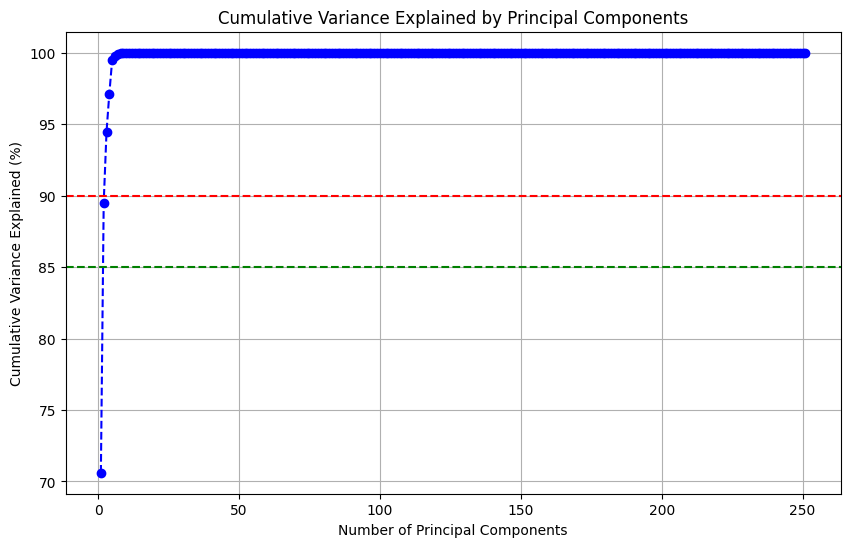

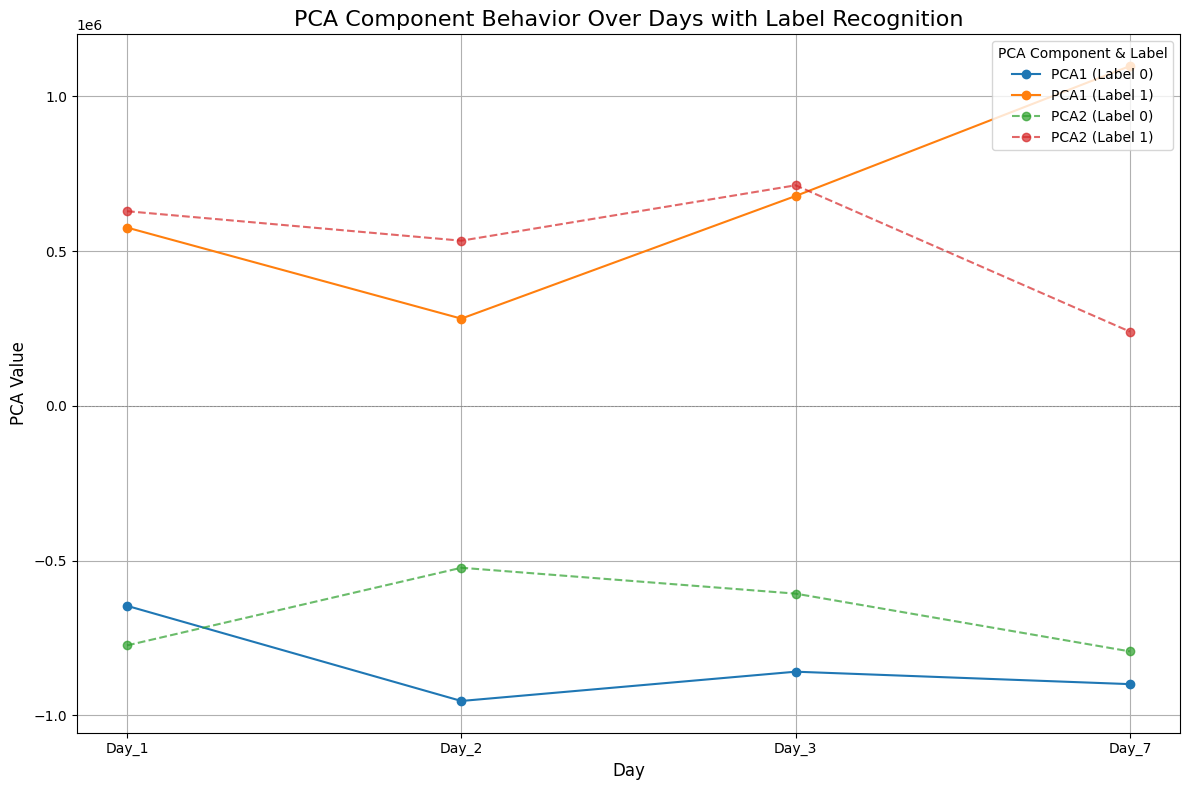

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Load the datasets
LW5 = pd.read_csv('LW5.csv')
LW6 = pd.read_csv('LW6.csv')

# Combine the datasets and assign labels
LW5['Label'] = 1  # Assign label 1
LW6['Label'] = 0  # Assign label 0
df = pd.concat([LW5, LW6], ignore_index=True)

# Removing non-numeric columns like 'Day', 'Trial', 'Label', and time columns for PCA analysis
numeric_data = df.select_dtypes(include=[np.number])

# Perform PCA for dimensionality reduction
pca = PCA(n_components=numeric_data.shape[1])  # Set to max number of features to see the full variance spectrum
pca_result = pca.fit_transform(numeric_data)

# Calculate the cumulative variance explained by each principal component
cumulative_variance = np.cumsum(pca.explained_variance_ratio_) * 100  # Convert to percentage

# Plot cumulative variance explained
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained (%)')
plt.grid(True)
plt.axhline(y=90, color='r', linestyle='--')  # Line indicating the 90% threshold
plt.axhline(y=85, color='g', linestyle='--')  # Line indicating the 85% threshold
plt.show()

# Perform PCA with 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numeric_data)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Visualize the PCA results to detect concept drift over different days
# Filter data for four consecutive days (example: Day_1 to Day_4)
days_to_visualize = ['Day_1', 'Day_2', 'Day_3', 'Day_7']
subset_df = df[df['Day'].isin(days_to_visualize)]

# Calculate the mean values of PCA1 and PCA2 for each day to summarize their behavior
mean_pca_values = subset_df.groupby(['Day', 'Label'])[['PCA1', 'PCA2']].mean().reset_index()

# Plotting the behavior of PCA1 and PCA2 over the days with labels recognized
plt.figure(figsize=(12, 8))

# Plot PCA1 behavior for each label
for label in mean_pca_values['Label'].unique():
    subset = mean_pca_values[mean_pca_values['Label'] == label]
    plt.plot(subset['Day'], subset['PCA1'], marker='o', linestyle='-', label=f'PCA1 (Label {label})')

# Plot PCA2 behavior for each label
for label in mean_pca_values['Label'].unique():
    subset = mean_pca_values[mean_pca_values['Label'] == label]
    plt.plot(subset['Day'], subset['PCA2'], marker='o', linestyle='--', label=f'PCA2 (Label {label})', alpha=0.7)

# Adding labels and titles to the plot
plt.title('PCA Component Behavior Over Days with Label Recognition', fontsize=16)
plt.xlabel('Day', fontsize=12)
plt.ylabel('PCA Value', fontsize=12)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)  # Reference line at 0
plt.legend(title='PCA Component & Label', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


**Concept drift adaptation methods under the deep learning framework**

Detecting concept drift and adapting models in a time-series classification context by employing both a Neural Network (NN) and a Recurrent Neural Network (RNN) to classify data points while incorporating K-Means clustering for drift detection.


*   **Data Preparation:** By loading two datasets (W5 and W6), assigning labels for classification, and concatenating them. It then splits the Day 1 data into training, validation, and test sets, while also scaling the features for better performance.
*   **Model Creation:** It constructs two different models: a feedforward Neural Network and a Recurrent Neural Network. Both models are trained on the training set, with early stopping used to prevent overfitting.

*  **Drift Detection:** It implements a K-Means clustering approach to check for concept drift in the data based on evaluateing silhouette scores.If significant drift is detected, the models are retrained with the new data.

*  **Model Evaluation:** The models are evaluated on test sets for each day, calculating individual and ensemble error rates. The ensemble prediction is created by averaging the predicted probabilities from both models.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the datasets
LW5 = pd.read_csv('LW5.csv')
LW6 = pd.read_csv('LW6.csv')

# Combine the datasets and assign labels
LW5['Label'] = 1  # Assign label 1
LW6['Label'] = 0  # Assign label 0
label_data = pd.concat([LW5, LW6], ignore_index=True)

# Split Day 1 data into train and test
day_1_data = label_data[label_data['Day'] == 'Day_1']

# Use 50% of Day 1 for training
train_data_day_1, test_data_day_1 = train_test_split(day_1_data, test_size=0.5, random_state=42)

# From the training data, extract 10% for validation
train_data, val_data = train_test_split(train_data_day_1, test_size=0.1, random_state=42)

# Prepare training features and labels
X_train = train_data.drop(columns=['Label', 'Day', 'Trial', 'Start_Time', 'End_Time']).values
y_train = train_data['Label'].values

# Prepare validation features and labels
X_val = val_data.drop(columns=['Label', 'Day', 'Trial', 'Start_Time', 'End_Time']).values
y_val = val_data['Label'].values

# Prepare test set: all remaining Day 1 data + all data from Day 2, Day 3, Day 7
remaining_test_data = pd.concat([test_data_day_1,
    label_data[label_data['Day'].isin(['Day_2', 'Day_3', 'Day_7'])]])

# Prepare test features and labels
X_test = remaining_test_data.drop(columns=['Label', 'Day', 'Trial', 'Start_Time', 'End_Time']).values
y_test = remaining_test_data['Label'].values

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Reshape the data for RNN (samples, timesteps, features)
X_train_rnn = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val_rnn = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test_rnn = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Create Neural Network Model
def create_nn_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(20, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(1, activation='sigmoid')  # For binary classification
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Create Recurrent Neural Network (RNN) Model
def create_rnn_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(20, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(1, activation='sigmoid')  # For binary classification
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Train the models with early stopping
nn_model = create_nn_model((X_train.shape[1],))
rnn_model = create_rnn_model((X_train_rnn.shape[1], X_train_rnn.shape[2]))

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the NN model
nn_model.fit(X_train, y_train,
              validation_data=(X_val, y_val),
              epochs=100,
              callbacks=[early_stopping],
              batch_size=32)

# Fit the RNN model
rnn_model.fit(X_train_rnn, y_train,
               validation_data=(X_val_rnn, y_val),
               epochs=100,
               callbacks=[early_stopping],
               batch_size=32)

import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# K-Means Drift Detection Function using Silhouette Score
def check_drift_kmeans(X_train, new_data):
    silhouette_scores = []

    # Evaluate silhouette scores for n_clusters from 2 to 5
    for n_clusters in range(2, 6):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(X_train)
        silhouette_avg = silhouette_score(X_train, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)

    best_n_clusters = np.argmax(silhouette_scores) + 2  # Add 2 to offset the range start from 2
    print(f'Optimal number of clusters based on silhouette score: {best_n_clusters}')

    # Fit on initial training data with the optimal number of clusters
    kmeans_initial = KMeans(n_clusters=best_n_clusters, random_state=42)
    kmeans_initial.fit(X_train)
    initial_silhouette = silhouette_score(X_train, kmeans_initial.labels_)
    print(f'Initial silhouette score: {initial_silhouette}')

    # Fit on new data to get the silhouette score
    kmeans_new = KMeans(n_clusters=best_n_clusters, random_state=42)
    kmeans_new.fit(new_data)
    new_silhouette = silhouette_score(new_data, kmeans_new.labels_)
    print(f'New silhouette score: {new_silhouette}')

    # Detect concept drift based on silhouette score
    # Calculate the absolute difference between the initial and new silhouette scores
    silhouette_difference = abs(initial_silhouette - new_silhouette)

    # Set a threshold for what constitutes a significant change
    threshold = 0.001  # We can adjust this value based on our data and drift sensitivity

    # Detect concept drift based on the silhouette score difference
    drift_detected = silhouette_difference > threshold

    return drift_detected, threshold

# Function to retrain the model using updated data
def retrain_model(model, X_train, y_train, X_val, y_val):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    model.fit(X_train, y_train,
              validation_data=(X_val, y_val),
              epochs=100,
              callbacks=[early_stopping],
              batch_size=32)
    return model

# Initialize error rates dictionary for all strategies
error_rates = {'Day': [], 'Label': [], 'NN Error Rate': [], 'RNN Error Rate': [], 'Ensemble Error Rate': []}

# Evaluate the model on the test set for each day separately
for day in [1, 2, 3, 7]:
    current_day_data = label_data[label_data['Day'] == f'Day_{day}']

    # Prepare test features and labels for the current day
    X_current_test = current_day_data.drop(columns=['Label', 'Day', 'Trial', 'Start_Time', 'End_Time']).values
    y_current_test = current_day_data['Label'].values

    # Scale the test features
    X_current_test_scaled = scaler.transform(X_current_test)
    X_current_test_rnn = X_current_test_scaled.reshape((X_current_test_scaled.shape[0], 1, X_current_test_scaled.shape[1]))

    # Predict probabilities using NN and RNN models
    y_prob_nn = nn_model.predict(X_current_test_scaled)
    y_prob_rnn = rnn_model.predict(X_current_test_rnn)

    # Ensemble prediction using average probabilities
    y_pred_ensemble = np.round((y_prob_nn.flatten() + y_prob_rnn.flatten()) / 2).astype(int)
    ensemble_accuracy = np.mean(y_pred_ensemble == y_current_test)
    ensemble_error_rate = 1 - ensemble_accuracy

    # Calculate individual error rates for both labels
    for label in [0, 1]:
        # Filter predictions based on the current label
        indices = np.where(y_current_test == label)[0]

        if len(indices) > 0:
            y_pred_nn_label = (y_prob_nn[indices].flatten() > 0.5).astype(int)
            y_pred_rnn_label = (y_prob_rnn[indices].flatten() > 0.5).astype(int)

            nn_accuracy_label = np.mean(y_pred_nn_label == label)
            nn_error_rate_label = 1 - nn_accuracy_label

            rnn_accuracy_label = np.mean(y_pred_rnn_label == label)
            rnn_error_rate_label = 1 - rnn_accuracy_label

            # Append results to the error rates list
            error_rates['Day'].append(f'Day_{day}')
            error_rates['Label'].append(label)
            error_rates['NN Error Rate'].append(nn_error_rate_label)
            error_rates['RNN Error Rate'].append(rnn_error_rate_label)
            error_rates['Ensemble Error Rate'].append(ensemble_error_rate)

            print(f'Test Accuracy for Day {day} - Label {label}: NN: {nn_accuracy_label:.4f}, RNN: {rnn_accuracy_label:.4f}, Ensemble: {ensemble_accuracy:.4f}')

    # Check for concept drift using K-Means clustering
    drift_detected, threshold = check_drift_kmeans(X_train, X_current_test_scaled)

    if drift_detected:
        print(f'Concept drift detected: Silhouette difference score is above the threshold of {threshold}')

        # Retrain the model with new data
        X_retrain = np.concatenate([X_train, X_current_test_scaled])
        y_retrain = np.concatenate([y_train, y_current_test])

        nn_model = retrain_model(nn_model, X_retrain, y_retrain, X_val, y_val)
        rnn_model = retrain_model(rnn_model, X_retrain.reshape((X_retrain.shape[0], 1, X_retrain.shape[1])), y_retrain, X_val_rnn, y_val)
    else:
        print(f'No concept drift detected: Silhouette difference score is lower the threshold of {threshold}')

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7613 - loss: 0.5317 - val_accuracy: 0.9153 - val_loss: 0.2871
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9315 - loss: 0.2782 - val_accuracy: 0.9322 - val_loss: 0.2092
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9696 - loss: 0.1761 - val_accuracy: 0.9661 - val_loss: 0.1743
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9663 - loss: 0.1575 - val_accuracy: 0.9661 - val_loss: 0.1670
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9736 - loss: 0.1275 - val_accuracy: 0.9661 - val_loss: 0.1693
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9763 - loss: 0.1208 - val_accuracy: 0.9661 - val_loss: 0.1643
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9758 - loss: 0.1053 - val_accuracy: 0.9661 - val_loss: 0.1712
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9680 - loss: 0.1255 - val_accuracy: 0.9661 - val_loss: 0.

# **Evaluation**

*  **Results Visualization:** It plots the error rates for the NN, RNN, and ensemble predictions over the different days, providing insight into the performance of the models and the impact of concept drift.

<ipython-input-30-c9d4f3e83260>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_rates_label_0['NN Error Rate'] = pd.to_numeric(error_rates_label_0['NN Error Rate'])
<ipython-input-30-c9d4f3e83260>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_rates_label_0['RNN Error Rate'] = pd.to_numeric(error_rates_label_0['RNN Error Rate'])
<ipython-input-30-c9d4f3e83260>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

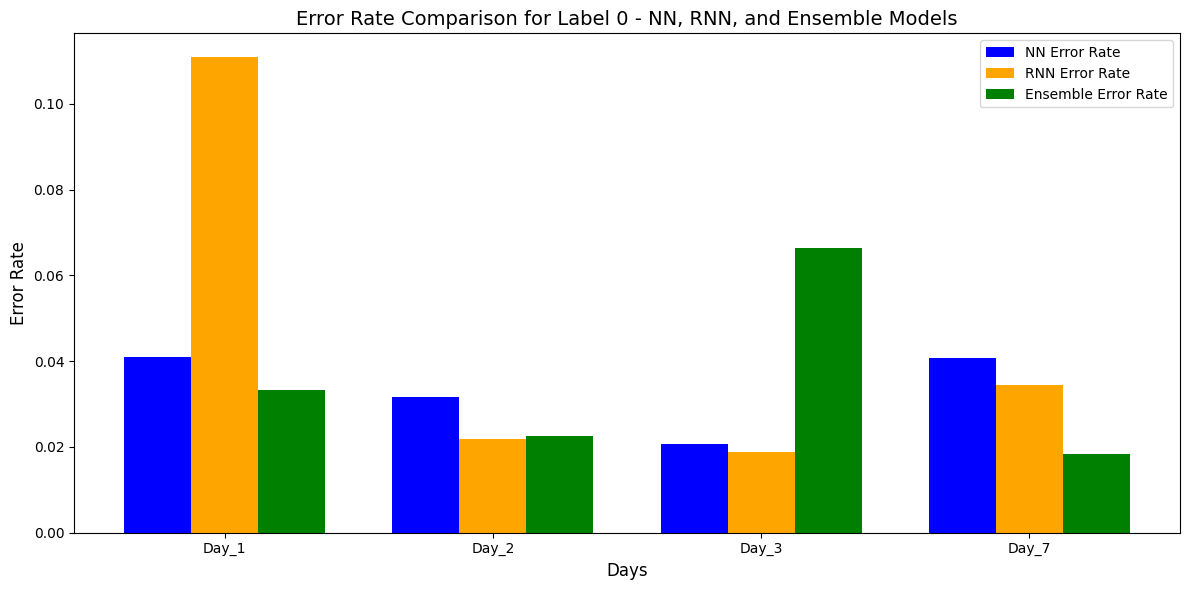

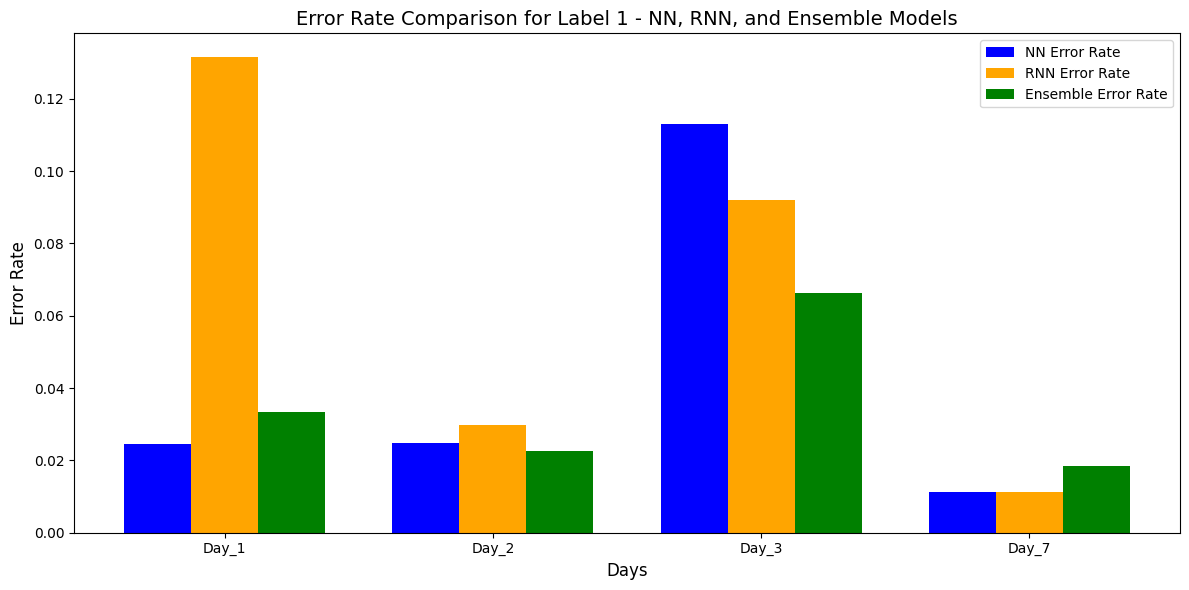

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create DataFrame
error_rates_df = pd.DataFrame(error_rates)

# Separate the DataFrame into two based on label
error_rates_label_0 = error_rates_df[error_rates_df['Label'] == 0]
error_rates_label_1 = error_rates_df[error_rates_df['Label'] == 1]

# Convert error rate columns to numeric if they are not
error_rates_label_0['NN Error Rate'] = pd.to_numeric(error_rates_label_0['NN Error Rate'])
error_rates_label_0['RNN Error Rate'] = pd.to_numeric(error_rates_label_0['RNN Error Rate'])
error_rates_label_0['Ensemble Error Rate'] = pd.to_numeric(error_rates_label_0['Ensemble Error Rate'])

error_rates_label_1['NN Error Rate'] = pd.to_numeric(error_rates_label_1['NN Error Rate'])
error_rates_label_1['RNN Error Rate'] = pd.to_numeric(error_rates_label_1['RNN Error Rate'])
error_rates_label_1['Ensemble Error Rate'] = pd.to_numeric(error_rates_label_1['Ensemble Error Rate'])

# Plotting the comparison chart for label 0
plt.figure(figsize=(12, 6))
bar_width = 0.25
x = np.arange(len(error_rates_label_0['Day']))

# Bar plot for NN, RNN, and Ensemble error rates for Label 0
plt.bar(x - bar_width, error_rates_label_0['NN Error Rate'], bar_width, label='NN Error Rate', color='blue')
plt.bar(x, error_rates_label_0['RNN Error Rate'], bar_width, label='RNN Error Rate', color='orange')
plt.bar(x + bar_width, error_rates_label_0['Ensemble Error Rate'], bar_width, label='Ensemble Error Rate', color='green')

# Adding labels and formatting
plt.xlabel('Days', fontsize=12)
plt.ylabel('Error Rate', fontsize=12)
plt.title('Error Rate Comparison for Label 0 - NN, RNN, and Ensemble Models', fontsize=14)
plt.xticks(x, error_rates_label_0['Day'])
plt.legend()
plt.tight_layout()
plt.show()

# Plotting the comparison chart for label 1
plt.figure(figsize=(12, 6))
bar_width = 0.25
x = np.arange(len(error_rates_label_1['Day']))

# Bar plot for NN, RNN, and Ensemble error rates for Label 1
plt.bar(x - bar_width, error_rates_label_1['NN Error Rate'], bar_width, label='NN Error Rate', color='blue')
plt.bar(x, error_rates_label_1['RNN Error Rate'], bar_width, label='RNN Error Rate', color='orange')
plt.bar(x + bar_width, error_rates_label_1['Ensemble Error Rate'], bar_width, label='Ensemble Error Rate', color='green')

# Adding labels and formatting
plt.xlabel('Days', fontsize=12)
plt.ylabel('Error Rate', fontsize=12)
plt.title('Error Rate Comparison for Label 1 - NN, RNN, and Ensemble Models', fontsize=14)
plt.xticks(x, error_rates_label_1['Day'])
plt.legend()
plt.tight_layout()
plt.show()


*   **Basic Models without concept drift detection**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the datasets
LW5 = pd.read_csv('LW5.csv')
LW6 = pd.read_csv('LW6.csv')

# Combine the datasets and assign labels
LW5['Label'] = 1  # Assign label 1
LW6['Label'] = 0  # Assign label 0
label_data = pd.concat([LW5, LW6], ignore_index=True)

# Split Day 1 data into train and test
day_1_data = label_data[label_data['Day'] == 'Day_1']

# Use 50% of Day 1 for training
train_data_day_1, test_data_day_1 = train_test_split(day_1_data, test_size=0.5, random_state=42)

# From the training data, extract 10% for validation
train_data, val_data = train_test_split(train_data_day_1, test_size=0.1, random_state=42)

# Prepare training features and labels
X_train = train_data.drop(columns=['Label', 'Day', 'Trial', 'Start_Time', 'End_Time']).values
y_train = train_data['Label'].values

# Prepare validation features and labels
X_val = val_data.drop(columns=['Label', 'Day', 'Trial', 'Start_Time', 'End_Time']).values
y_val = val_data['Label'].values

# Prepare test set: all remaining Day 1 data + all data from Day 2, Day 3, Day 7
remaining_test_data = pd.concat([test_data_day_1,
    label_data[label_data['Day'].isin(['Day_2', 'Day_3', 'Day_7'])]])

# Prepare test features and labels
X_test = remaining_test_data.drop(columns=['Label', 'Day', 'Trial', 'Start_Time', 'End_Time']).values
y_test = remaining_test_data['Label'].values

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Reshape the data for RNN (samples, timesteps, features)
X_train_rnn = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val_rnn = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test_rnn = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Create Neural Network Model
def create_nn_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(20, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(1, activation='sigmoid')  # For binary classification
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Create Recurrent Neural Network (RNN) Model
def create_rnn_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(20, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(1, activation='sigmoid')  # For binary classification
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Train the models with early stopping
nn_model = create_nn_model((X_train.shape[1],))
rnn_model = create_rnn_model((X_train_rnn.shape[1], X_train_rnn.shape[2]))

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the NN model
nn_model.fit(X_train, y_train,
              validation_data=(X_val, y_val),
              epochs=100,
              callbacks=[early_stopping],
              batch_size=32)

# Fit the RNN model
rnn_model.fit(X_train_rnn, y_train,
               validation_data=(X_val_rnn, y_val),
               epochs=100,
               callbacks=[early_stopping],
               batch_size=32)

# Initialize error rates dictionary for all strategies
error_rates1 = {'Day': [], 'Label': [], 'NN Error Rate': [], 'RNN Error Rate': [], 'Ensemble Error Rate': []}

# Evaluate the model on the test set for each day separately
for day in [1, 2, 3, 7]:
    current_day_data = label_data[label_data['Day'] == f'Day_{day}']

    # Prepare test features and labels for the current day
    X_current_test = current_day_data.drop(columns=['Label', 'Day', 'Trial', 'Start_Time', 'End_Time']).values
    y_current_test = current_day_data['Label'].values

    # Scale the test features
    X_current_test_scaled = scaler.transform(X_current_test)
    X_current_test_rnn = X_current_test_scaled.reshape((X_current_test_scaled.shape[0], 1, X_current_test_scaled.shape[1]))

    # Predict probabilities using NN and RNN models
    y_prob_nn = nn_model.predict(X_current_test_scaled)
    y_prob_rnn = rnn_model.predict(X_current_test_rnn)

    # Ensemble prediction using average probabilities
    y_pred_ensemble = np.round((y_prob_nn.flatten() + y_prob_rnn.flatten()) / 2).astype(int)
    ensemble_accuracy = np.mean(y_pred_ensemble == y_current_test)
    ensemble_error_rate = 1 - ensemble_accuracy

    # Calculate individual error rates for both labels
    for label in [0, 1]:
        # Filter predictions based on the current label
        indices = np.where(y_current_test == label)[0]

        if len(indices) > 0:
            y_pred_nn_label = (y_prob_nn[indices].flatten() > 0.5).astype(int)
            y_pred_rnn_label = (y_prob_rnn[indices].flatten() > 0.5).astype(int)

            nn_accuracy_label = np.mean(y_pred_nn_label == label)
            nn_error_rate_label = 1 - nn_accuracy_label

            rnn_accuracy_label = np.mean(y_pred_rnn_label == label)
            rnn_error_rate_label = 1 - rnn_accuracy_label

            # Append results to the error rates list
            error_rates1['Day'].append(f'Day_{day}')
            error_rates1['Label'].append(label)
            error_rates1['NN Error Rate'].append(nn_error_rate_label)
            error_rates1['RNN Error Rate'].append(rnn_error_rate_label)
            error_rates1['Ensemble Error Rate'].append(ensemble_error_rate)

            print(f'Test Accuracy for Day {day} - Label {label}: NN: {nn_accuracy_label:.4f}, RNN: {rnn_accuracy_label:.4f}, Ensemble: {ensemble_accuracy:.4f}')


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6939 - loss: 0.5958 - val_accuracy: 0.9322 - val_loss: 0.3447
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9589 - loss: 0.2627 - val_accuracy: 0.9492 - val_loss: 0.2326
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9538 - loss: 0.1933 - val_accuracy: 0.9661 - val_loss: 0.2003
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9710 - loss: 0.1359 - val_accuracy: 0.9661 - val_loss: 0.1918
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9659 - loss: 0.1286 - val_accuracy: 0.9661 - val_loss: 0.1869
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9775 - loss: 0.1048 - val_accuracy: 0.9661 - val_loss: 0.1878
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9661 - loss: 0.1274 - val_accuracy: 0.9661 - val_loss: 0.1880
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9787 - loss: 0.0873 - val_accuracy: 0.9661 - val_loss: 0.

<ipython-input-32-cfa86ffe7b2c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_rates_label_0['NN Error Rate'] = pd.to_numeric(error_rates_label_0['NN Error Rate'])
<ipython-input-32-cfa86ffe7b2c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_rates_label_0['RNN Error Rate'] = pd.to_numeric(error_rates_label_0['RNN Error Rate'])
<ipython-input-32-cfa86ffe7b2c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

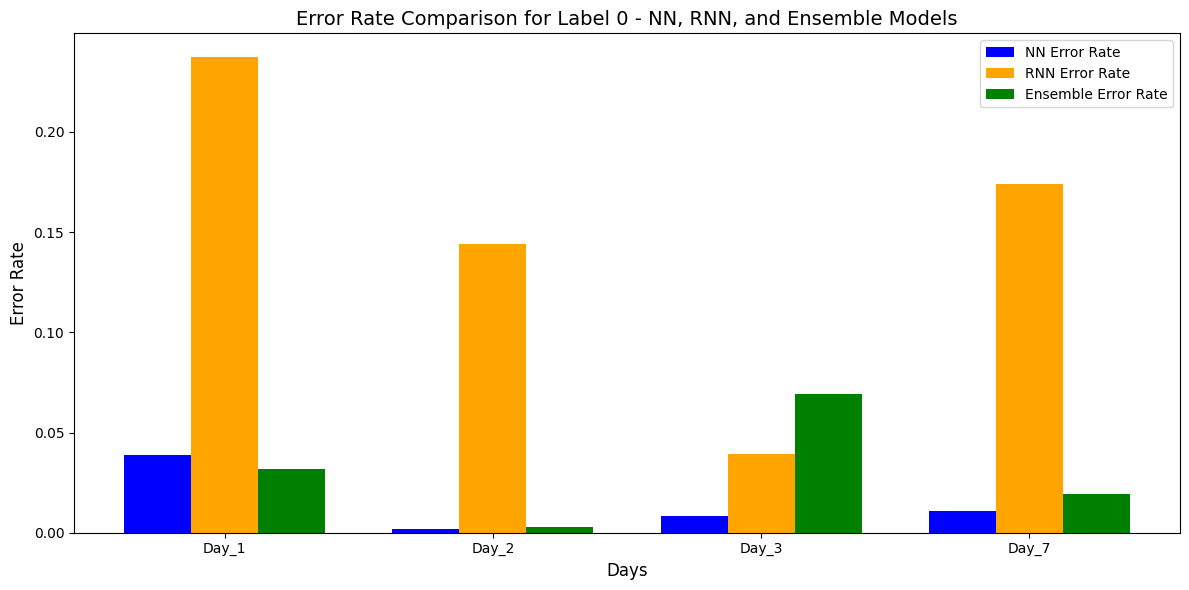

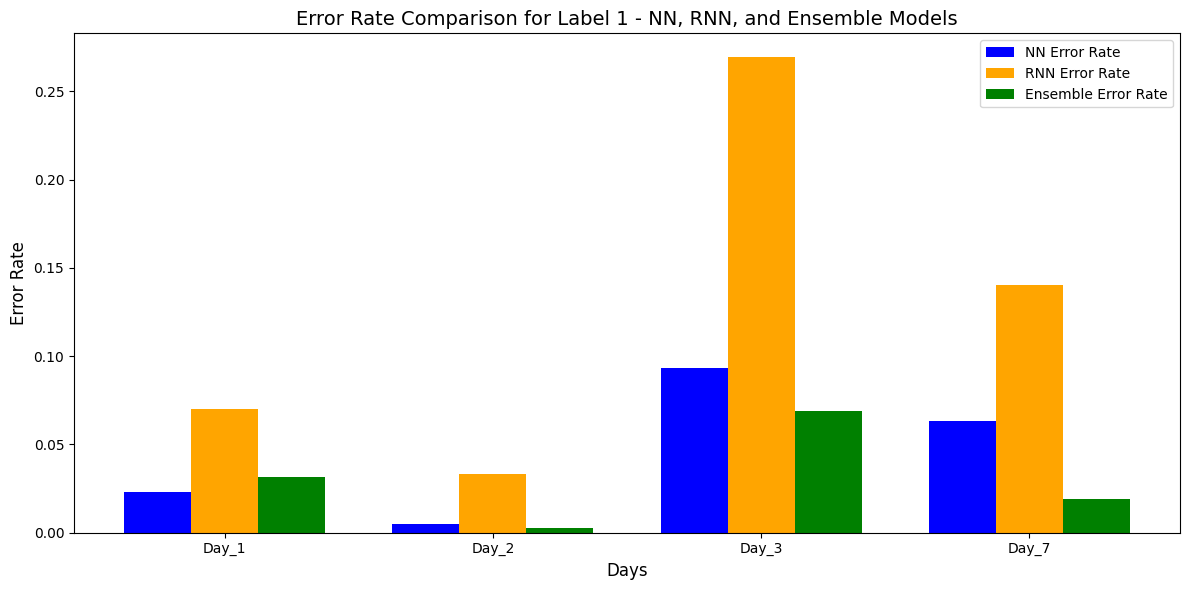

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create DataFrame
error_rates_df1 = pd.DataFrame(error_rates1)

# Separate the DataFrame into two based on label
error_rates_label_0 = error_rates_df1[error_rates_df1['Label'] == 0]
error_rates_label_1 = error_rates_df1[error_rates_df1['Label'] == 1]

# Convert error rate columns to numeric if they are not
error_rates_label_0['NN Error Rate'] = pd.to_numeric(error_rates_label_0['NN Error Rate'])
error_rates_label_0['RNN Error Rate'] = pd.to_numeric(error_rates_label_0['RNN Error Rate'])
error_rates_label_0['Ensemble Error Rate'] = pd.to_numeric(error_rates_label_0['Ensemble Error Rate'])

error_rates_label_1['NN Error Rate'] = pd.to_numeric(error_rates_label_1['NN Error Rate'])
error_rates_label_1['RNN Error Rate'] = pd.to_numeric(error_rates_label_1['RNN Error Rate'])
error_rates_label_1['Ensemble Error Rate'] = pd.to_numeric(error_rates_label_1['Ensemble Error Rate'])

# Plotting the comparison chart for label 0
plt.figure(figsize=(12, 6))
bar_width = 0.25
x = np.arange(len(error_rates_label_0['Day']))

# Bar plot for NN, RNN, and Ensemble error rates for Label 0
plt.bar(x - bar_width, error_rates_label_0['NN Error Rate'], bar_width, label='NN Error Rate', color='blue')
plt.bar(x, error_rates_label_0['RNN Error Rate'], bar_width, label='RNN Error Rate', color='orange')
plt.bar(x + bar_width, error_rates_label_0['Ensemble Error Rate'], bar_width, label='Ensemble Error Rate', color='green')

# Adding labels and formatting
plt.xlabel('Days', fontsize=12)
plt.ylabel('Error Rate', fontsize=12)
plt.title('Error Rate Comparison for Label 0 - NN, RNN, and Ensemble Models', fontsize=14)
plt.xticks(x, error_rates_label_0['Day'])
plt.legend()
plt.tight_layout()
plt.show()

# Plotting the comparison chart for label 1
plt.figure(figsize=(12, 6))
bar_width = 0.25
x = np.arange(len(error_rates_label_1['Day']))

# Bar plot for NN, RNN, and Ensemble error rates for Label 1
plt.bar(x - bar_width, error_rates_label_1['NN Error Rate'], bar_width, label='NN Error Rate', color='blue')
plt.bar(x, error_rates_label_1['RNN Error Rate'], bar_width, label='RNN Error Rate', color='orange')
plt.bar(x + bar_width, error_rates_label_1['Ensemble Error Rate'], bar_width, label='Ensemble Error Rate', color='green')

# Adding labels and formatting
plt.xlabel('Days', fontsize=12)
plt.ylabel('Error Rate', fontsize=12)
plt.title('Error Rate Comparison for Label 1 - NN, RNN, and Ensemble Models', fontsize=14)
plt.xticks(x, error_rates_label_1['Day'])
plt.legend()
plt.tight_layout()
plt.show()


*   **Comparing With and Without Concept Drift Detecion**

      Day  Label  NN Error Rate  RNN Error Rate  Ensemble Error Rate  \
0   Day_1      0       0.038911        0.237354             0.031678   
1   Day_1      1       0.022936        0.070336             0.031678   
2   Day_2      0       0.001976        0.144269             0.002700   
3   Day_2      1       0.004959        0.033058             0.002700   
4   Day_3      0       0.008316        0.039501             0.069028   
5   Day_3      1       0.093548        0.269355             0.069028   
6   Day_7      0       0.010730        0.173820             0.019355   
7   Day_7      1       0.063005        0.140549             0.019355   
8   Day_1      0       0.040856        0.110895             0.033390   
9   Day_1      1       0.024465        0.131498             0.033390   
10  Day_2      0       0.031621        0.021739             0.022502   
11  Day_2      1       0.024793        0.029752             0.022502   
12  Day_3      0       0.020790        0.018711             0.06

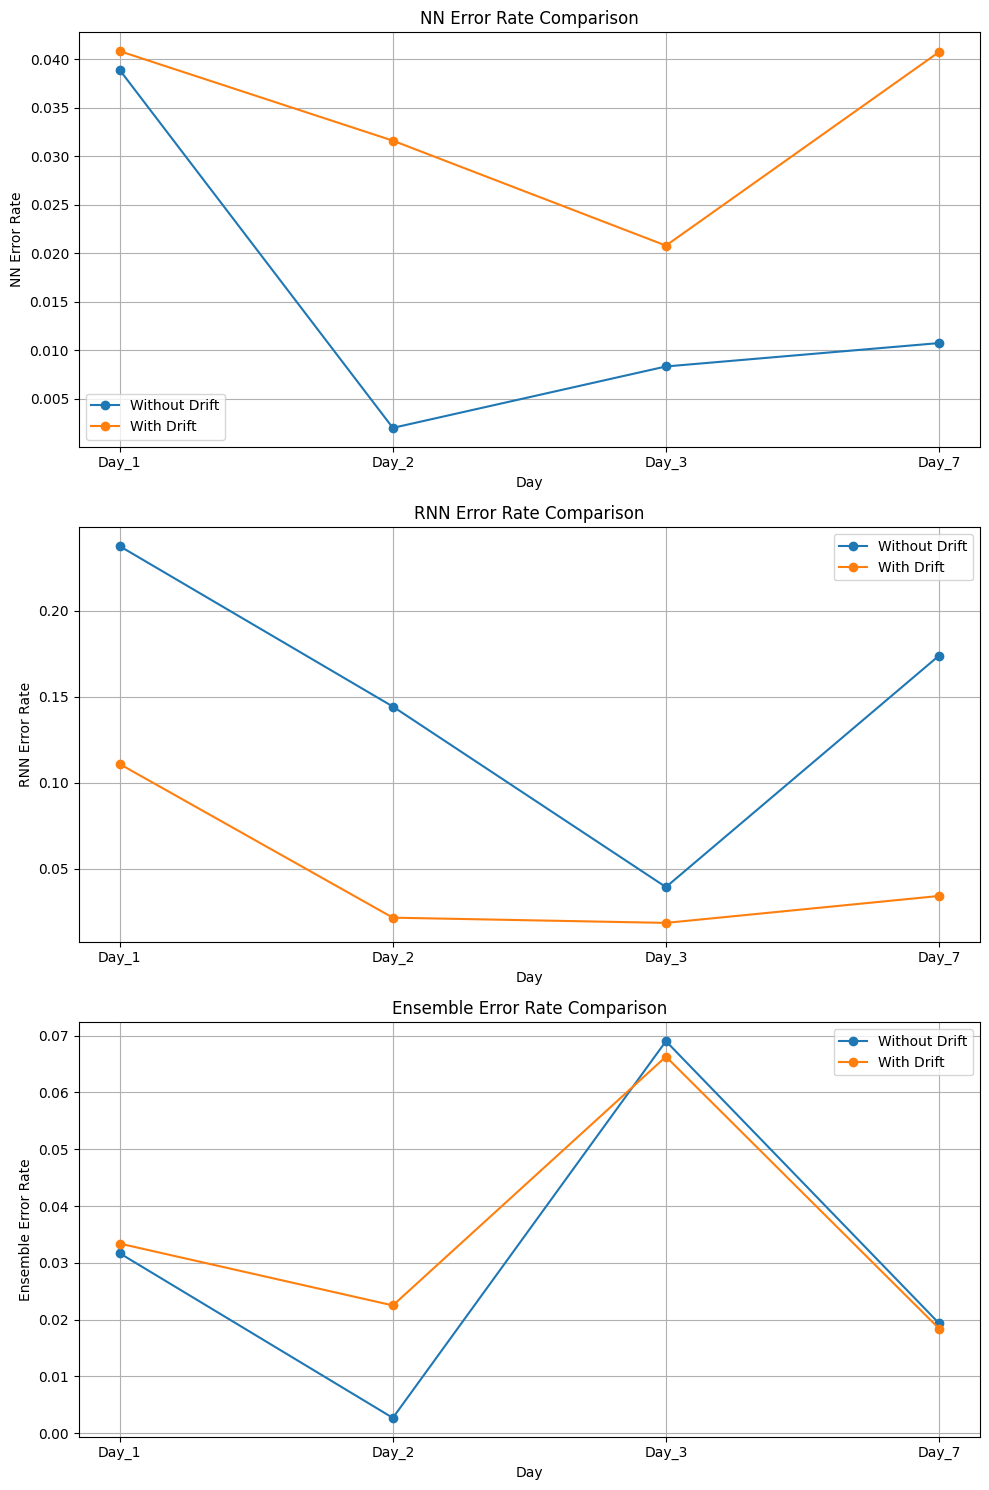

Ramp Ascending


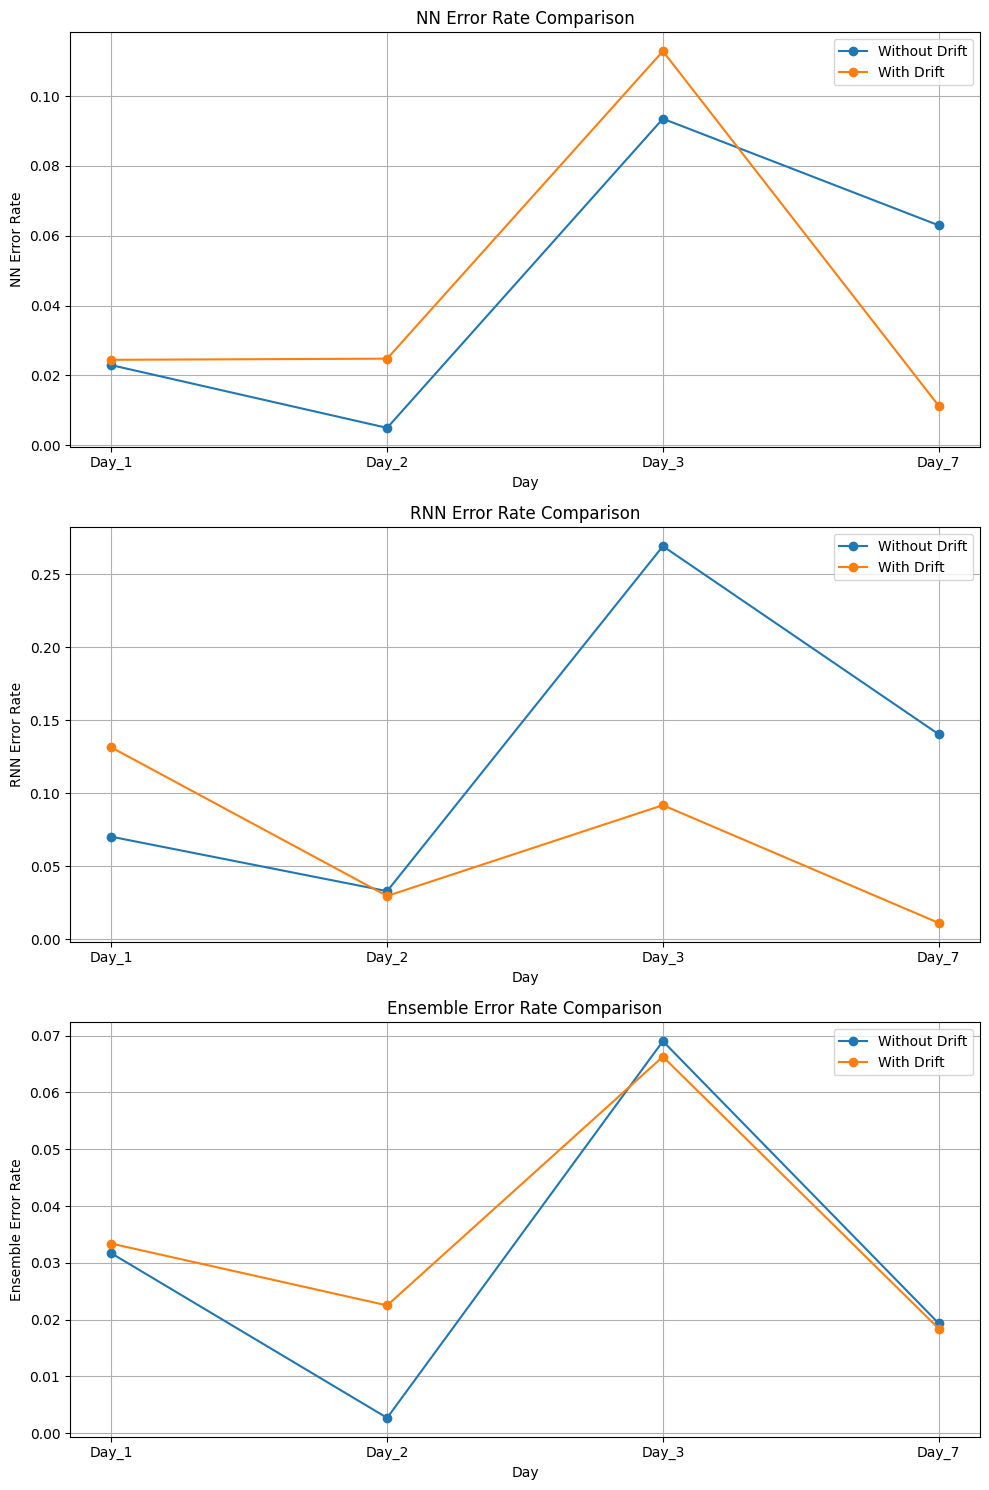

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Creating DataFrames
error_rates_df1 = pd.DataFrame(error_rates1)
error_rates_df = pd.DataFrame(error_rates)

# Adding a column to identify the datasets
error_rates_df1['Dataset'] = 'Without Drift'
error_rates_df['Dataset'] = 'With Drift'

# Merging the DataFrames
merged_df = pd.concat([error_rates_df1, error_rates_df], ignore_index=True)

# Display the merged DataFrame
print(merged_df)

# Plotting the error rates comparison
def plot_error_rates(merged_df):
    # Set up the figure and axes
    fig, axes = plt.subplots(3, 1, figsize=(10, 15))

    # Define the error rates to plot
    error_rates = ['NN Error Rate', 'RNN Error Rate', 'Ensemble Error Rate']

    # Plot each error rate
    for i, error_rate in enumerate(error_rates):
        for dataset in merged_df['Dataset'].unique():
            subset = merged_df[merged_df['Dataset'] == dataset]
            axes[i].plot(subset['Day'], subset[error_rate], marker='o', label=dataset)

        # Set title and labels
        axes[i].set_title(f'{error_rate} Comparison')
        axes[i].set_xlabel('Day')
        axes[i].set_ylabel(error_rate)
        axes[i].legend()
        axes[i].grid()

    # Show the plots
    plt.tight_layout()
    plt.show()

# Call the plotting function
print("Ramp Descending")
merged_df_0 = merged_df[merged_df['Label'] == 0]
plot_error_rates(merged_df_0)

print("Ramp Ascending")
merged_df_1 = merged_df[merged_df['Label'] == 1]
plot_error_rates(merged_df_1)


*  **Error rates comparison of our methods and paper [4] methods**

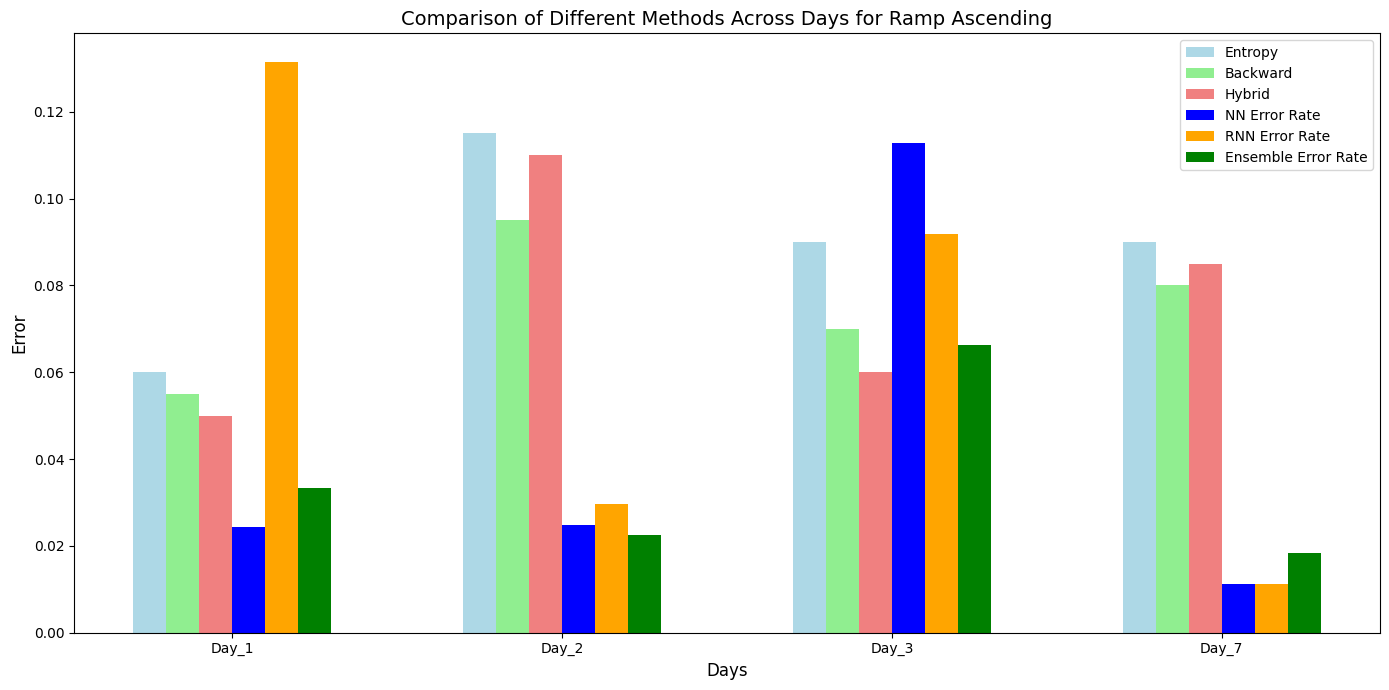

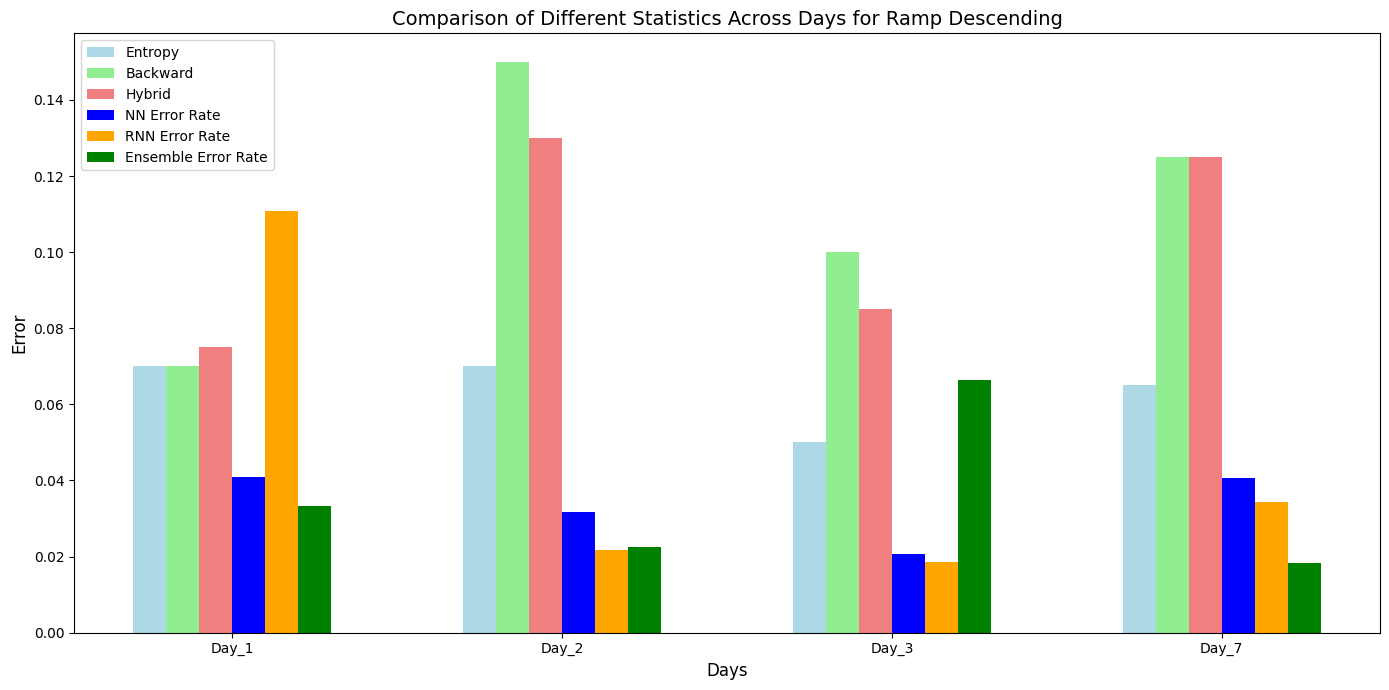

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# In our project
# Create DataFrame
error_rates_df = pd.DataFrame(error_rates)

# Separate the DataFrame into two based on label
error_rates_label_0 = error_rates_df[error_rates_df['Label'] == 0]
error_rates_label_1 = error_rates_df[error_rates_df['Label'] == 1]


# In paper [4]
# Error Data for Ramp Ascending
ramp_asc_data = {
    'Day': ['Day_1', 'Day_2', 'Day_3', 'Day_7'],
    'Entropy': [0.06, 0.115, 0.09, 0.09],
    'Backward': [0.055, 0.095, 0.07, 0.08],
    'Hybrid': [0.05, 0.11, 0.06, 0.085]
}

# Error Data for Ramp Descending
ramp_desc_data = {
    'Day': ['Day_1', 'Day_2', 'Day_3', 'Day_7'],
    'Entropy': [0.07, 0.07, 0.05, 0.065],
    'Backward': [0.07, 0.15, 0.1, 0.125],
    'Hybrid': [0.075, 0.13, 0.085, 0.125]
}


# Create DataFrames
df_ramp_asc = pd.DataFrame(ramp_asc_data)
df_error_asc = pd.DataFrame(error_rates_label_1)
# Merging the DataFrames A
merged_dfA = pd.merge(df_ramp_asc, df_error_asc, on='Day')

# Set bar width and positions
bar_width = 0.1
x = range(len(merged_dfA))

# Create figure and axis
plt.figure(figsize=(14, 7))

# Plotting the statistics
plt.bar([i - 2.5 * bar_width for i in x], merged_dfA['Entropy'], width=bar_width, label='Entropy', color='lightblue')
plt.bar([i - 1.5 * bar_width for i in x], merged_dfA['Backward'], width=bar_width, label='Backward', color='lightgreen')
plt.bar([i - 0.5 * bar_width for i in x], merged_dfA['Hybrid'], width=bar_width, label='Hybrid', color='lightcoral')
plt.bar([i + 0.5 * bar_width for i in x], merged_dfA['NN Error Rate'], width=bar_width, label='NN Error Rate', color='blue')
plt.bar([i + 1.5 * bar_width for i in x], merged_dfA['RNN Error Rate'], width=bar_width, label='RNN Error Rate', color='orange')
plt.bar([i + 2.5 * bar_width for i in x], merged_dfA['Ensemble Error Rate'], width=bar_width, label='Ensemble Error Rate', color='green')

# Adding labels and formatting
plt.xlabel('Days', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.title('Comparison of Different Methods Across Days for Ramp Ascending', fontsize=14)
plt.xticks(x, merged_dfA['Day'])
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

# Create DataFrames for Ramp Descending and plot if needed
df_ramp_desc = pd.DataFrame(ramp_desc_data)
df_error_desc = pd.DataFrame(error_rates_label_0)
# Merging the DataFrames D
merged_dfD = pd.merge(df_ramp_desc, df_error_desc, on='Day')

# Set bar width and positions
bar_width = 0.1
x = range(len(merged_dfD))

# Create figure and axis
plt.figure(figsize=(14, 7))

# Plotting the statistics
plt.bar([i - 2.5 * bar_width for i in x], merged_dfD['Entropy'], width=bar_width, label='Entropy', color='lightblue')
plt.bar([i - 1.5 * bar_width for i in x], merged_dfD['Backward'], width=bar_width, label='Backward', color='lightgreen')
plt.bar([i - 0.5 * bar_width for i in x], merged_dfD['Hybrid'], width=bar_width, label='Hybrid', color='lightcoral')
plt.bar([i + 0.5 * bar_width for i in x], merged_dfD['NN Error Rate'], width=bar_width, label='NN Error Rate', color='blue')
plt.bar([i + 1.5 * bar_width for i in x], merged_dfD['RNN Error Rate'], width=bar_width, label='RNN Error Rate', color='orange')
plt.bar([i + 2.5 * bar_width for i in x], merged_dfD['Ensemble Error Rate'], width=bar_width, label='Ensemble Error Rate', color='green')

# Adding labels and formatting
plt.xlabel('Days', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.title('Comparison of Different Statistics Across Days for Ramp Descending', fontsize=14)
plt.xticks(x, merged_dfD['Day'])
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()